# Variational Methods

## Exercise Sheet 3: Image Denoising

In the lecture we encountered the following cost function for denoising images:

$$
E_\lambda(u) = \frac{1}{2} \sum_{i=1}^{N} (f_i - u_i)^2 + 
                \frac{\lambda}{2} \sum_{i=1}^{N} \sum_{j\in \mathcal N(i)} (u_i - u_j)^2.
$$

where $u$ is the seeked image, $f$ is the input image and where $\mathcal N(i)$ denotes a neighborhood of
pixel $i$. Minimize the above function by solving the linear system of equations which arises
from the optimality condition, using the Gauss-Seidel method.

The exercise will be solved using tensorflow.

In [1]:
import tensorflow

The Gauss-Seidel method will be used for optimization.
Update pixel values sequentially always using the most recent values:
    
$$
u_i^{(k+1)} = \frac{1}{m_{ii}} (f_i - \sum_{j<i}
$$

In [2]:
import numpy as np
from pylab import *
%matplotlib inline

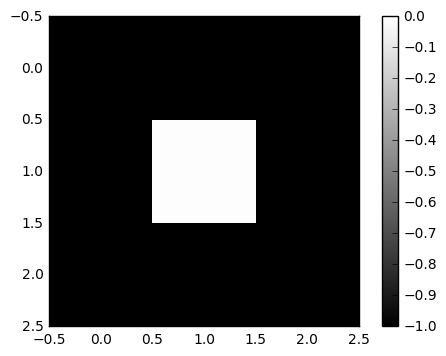

In [56]:
N = 3
λ = 0.1
i0, j0 = int((N-1)/2), int((N-1)/2)

k = np.zeros((N,N))
k[:,:]   = -1
k[i0,j0] = 0

imshow(k, cmap="gray", interpolation="none")
colorbar()
show()

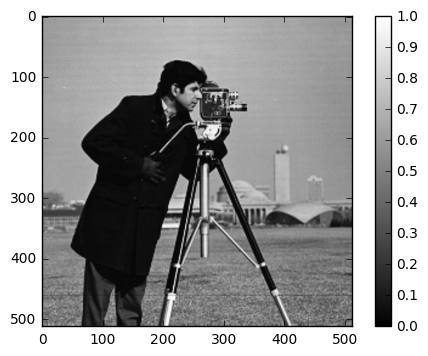

In [10]:
from skimage import data

f = data.camera() / 255.
imshow(f, cmap="gray")
colorbar()
show()

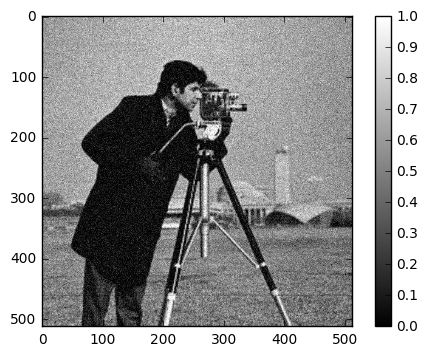

In [38]:
noise = np.random.normal(0, 0.1, size=f.shape)

u = (f + noise).clip(0,1)

imshow(u, cmap="gray")
colorbar()
show()

In [41]:
(abs(u - f)).mean()

0.075594941859280784

0.429556300755
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.429556300756
0.42955630

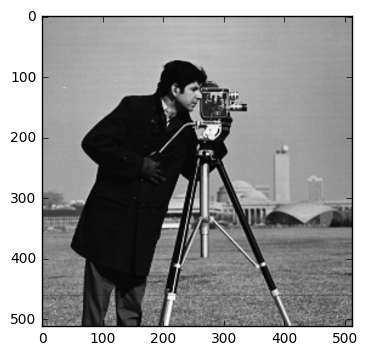

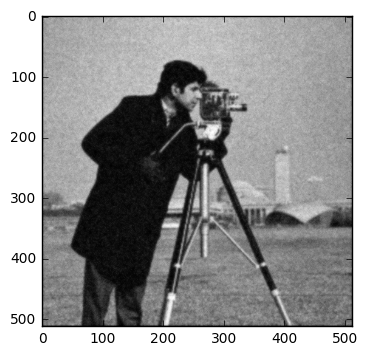

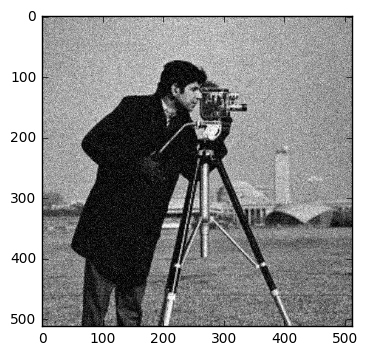

In [64]:
from scipy.signal import convolve2d

λ = 0.5

u_k = u
r_0 = abs(u - f).mean()
eps = r_0 / r_0
iterations = 0
while eps > 1e-7:
    iterations += 1
    Z = 1 + λ*(N**2 - 1)
    u_k = (u - λ * convolve2d(u_k, k, mode='same', boundary='fill', fillvalue=0)) / Z
    r_k = (abs(u_k - f)).mean()
    eps = r_k / r_0
    if iterations % 100 == 0:
        print(eps)
        if iterations == 1000:
            break


imshow(f, cmap="gray")
show()
imshow(u_k, cmap="gray")
show()
imshow(u, cmap="gray")
show()

In [42]:
(abs(u_k - f)).mean()

0.20571554168303657